# **Week 6 Class Assignment**
## **0706022310044 - Heidy Mudita Sutedjo**
## **0706022310051 - Amanda Michelle Darwis**

In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns, karena kadang klo columnnya banyak dia ga nampilin semua, cuma "..."

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head(10)

# Targetnya adalah "y"

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# get statistical info from dataset
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

In [ ]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding
education = {'unknown':0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df_encoded['education'] = df_encoded['education'].map(education)
df_encoded['month'] = df_encoded['month'].map(month)


# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'contact', 'poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4513,49,1.0,1.0,2,0,322,0,0,0.0,14,8,356,2,-1,0,3.0,0
4040,53,2.0,1.0,1,0,27,1,0,1.0,10,9,230,3,-1,0,3.0,1
4096,26,2.0,1.0,3,0,37,1,1,0.0,6,5,207,1,363,2,0.0,0
1854,34,4.0,2.0,3,0,2646,0,0,0.0,14,4,142,1,-1,0,3.0,1
2722,53,1.0,1.0,2,0,25,0,0,0.0,22,8,528,2,-1,0,3.0,1


In [ ]:
# checking encode result
df.loc[480]

,480
age,37
job,management
marital,single
education,unknown
default,no
balance,715
housing,yes
loan,no
contact,unknown
day,20


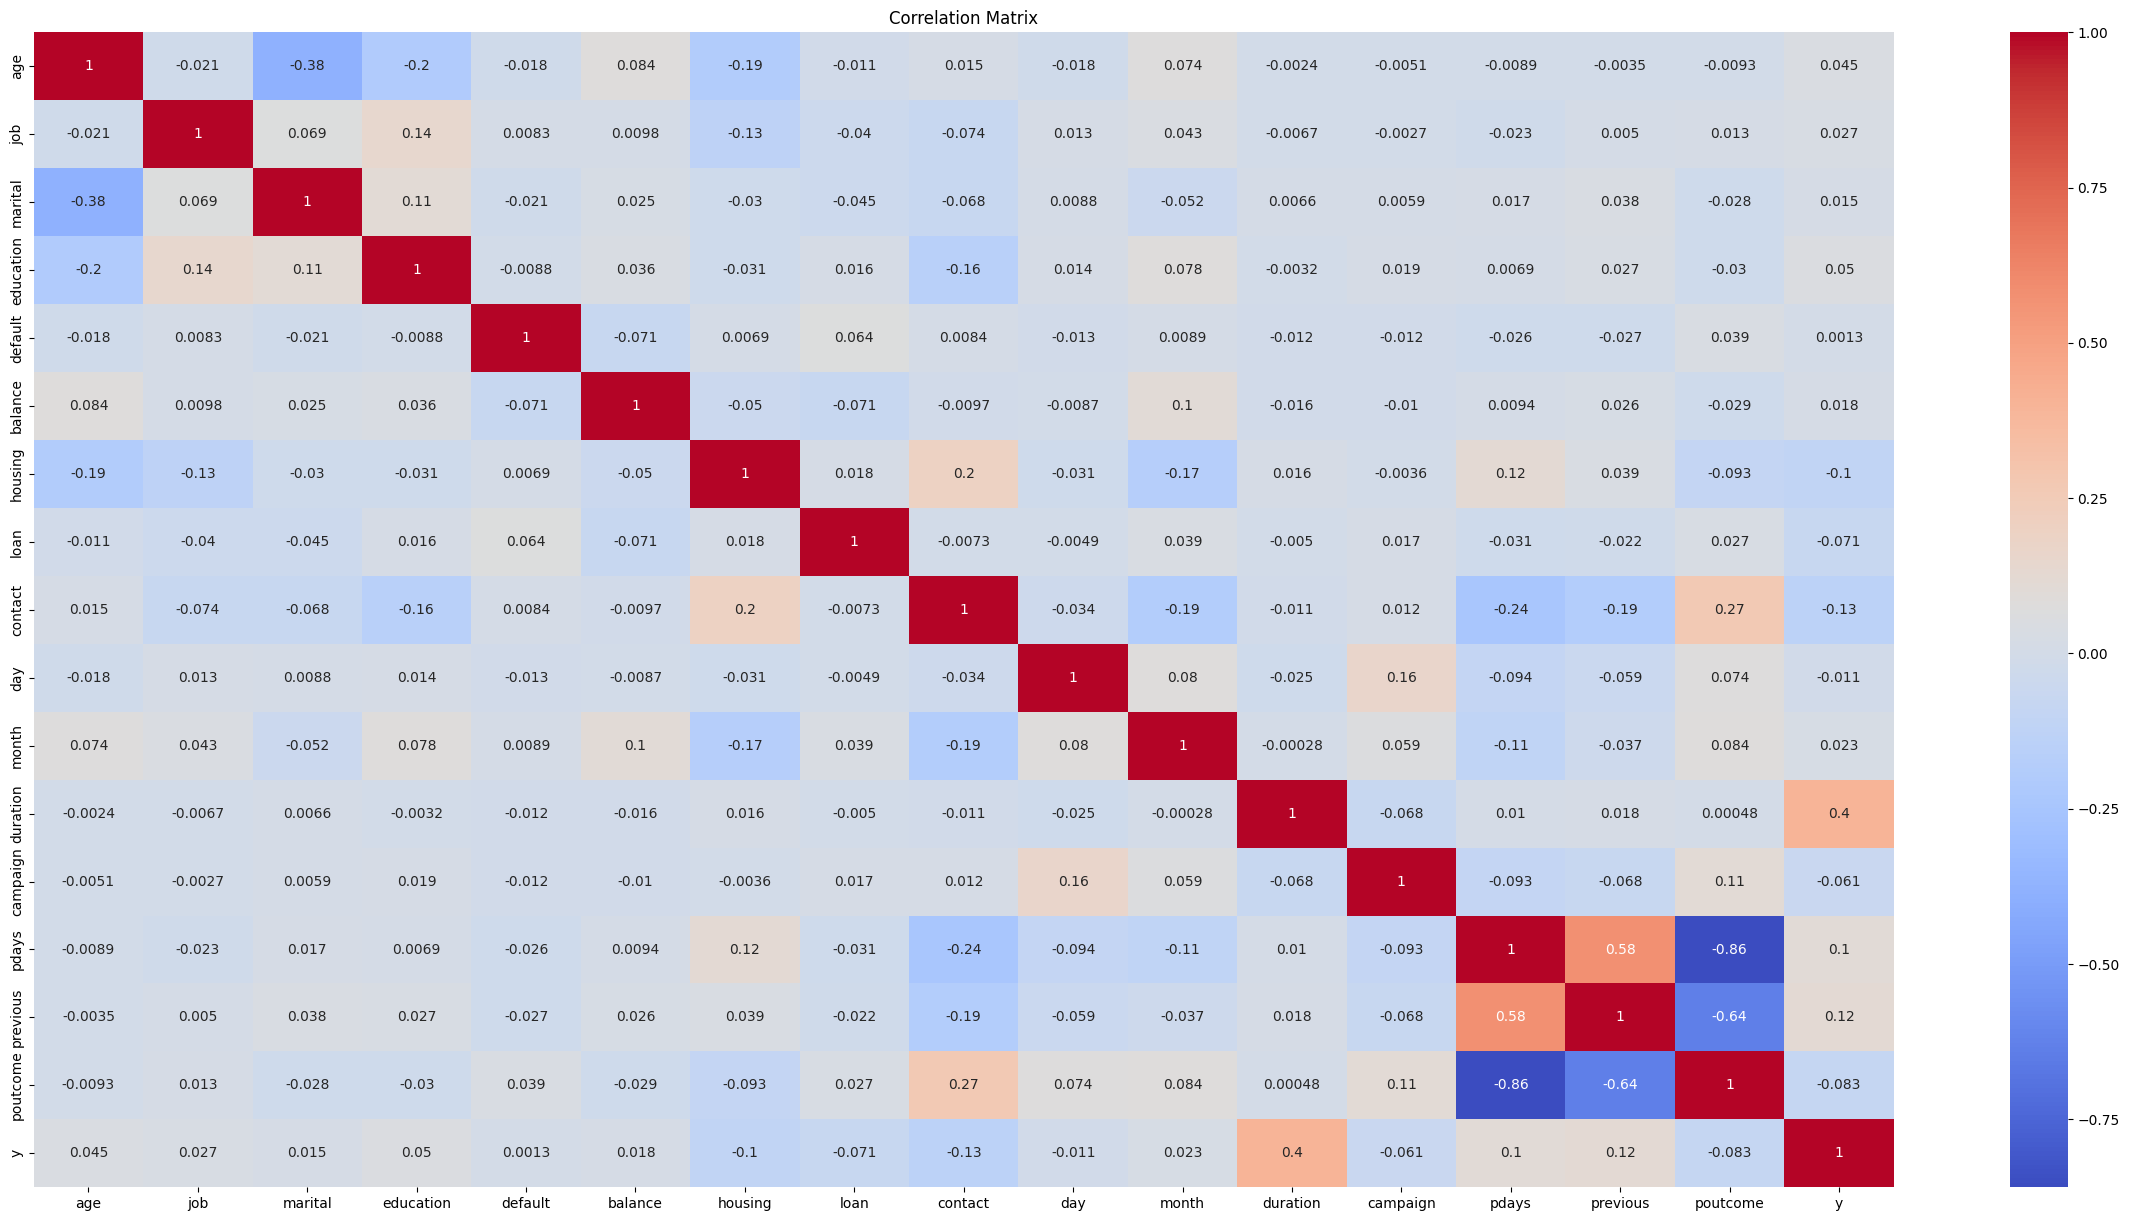

In [ ]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Looking at the heatmap, we can observe the following:

* **Duration and y:** There is a noticeable positive correlation between 'duration' and the target variable 'y'. This suggests that longer call durations are associated with a higher likelihood of a customer subscribing to a term deposit.
* **Pdays and Poutcome:** There is a relationship between 'pdays' (days since last contact) and 'poutcome' (outcome of the previous marketing campaign). This is expected as these features are related to previous interactions with the customer.
* **Other correlations:** We can also observe other correlations between different features, such as 'age' and 'balance', or 'job' and 'education'. These correlations can provide insights into the relationships between different aspects of the customer data.

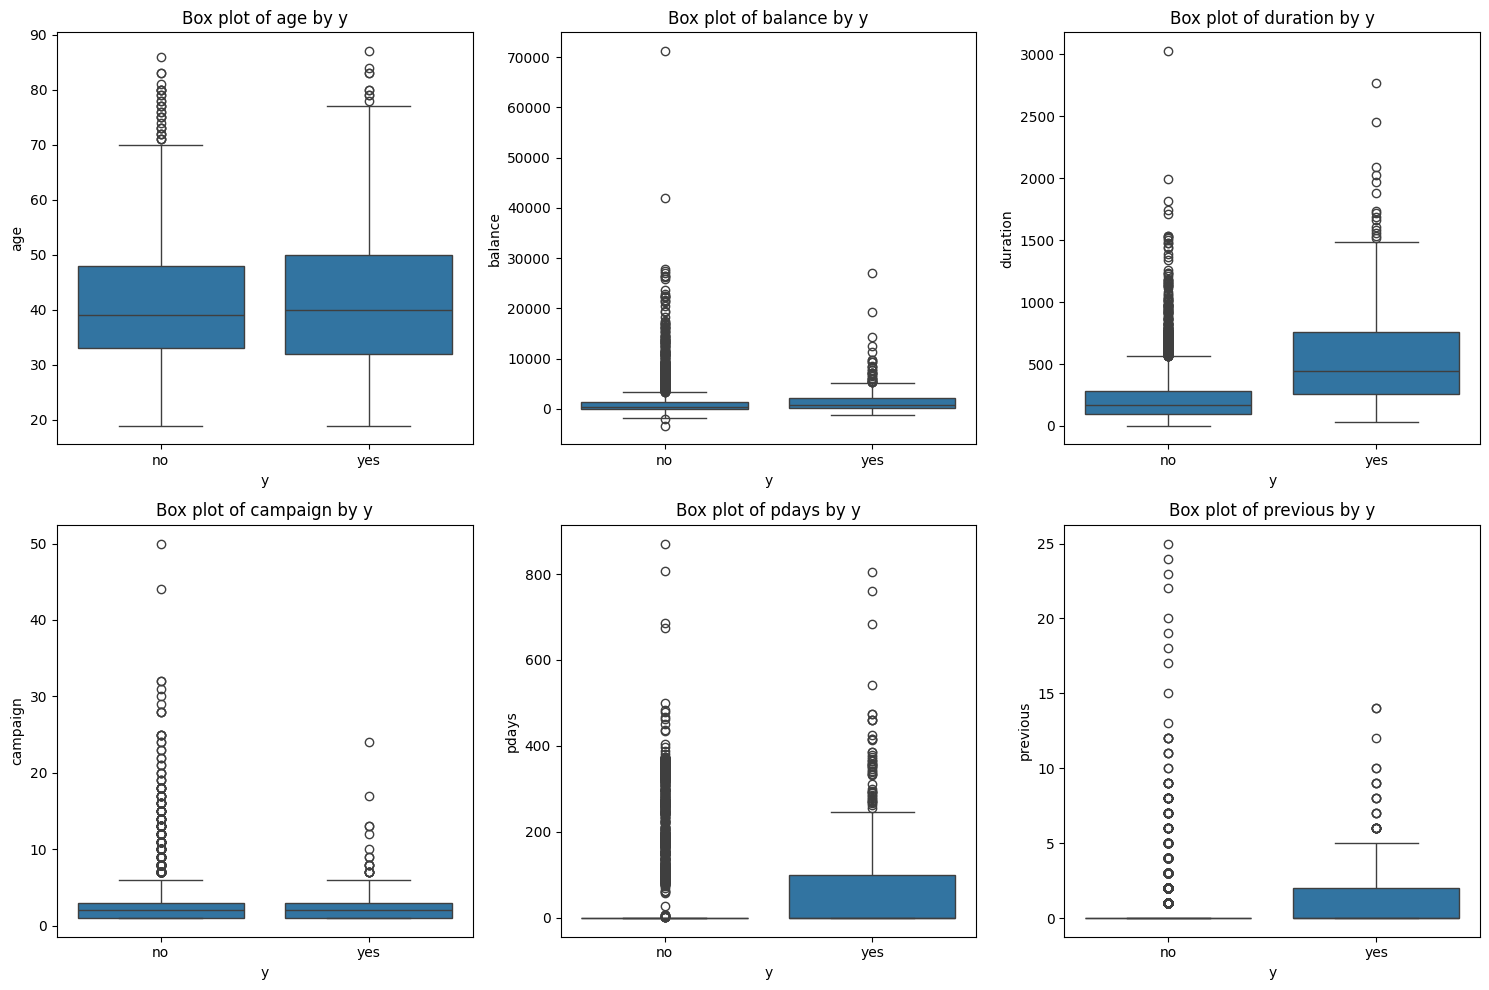

In [ ]:
# Visualize important features before modeling

# Numerical Features Box Plots
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Box plot of {col} by y')
plt.tight_layout()
plt.show()

The box plots shows the distribution of the numerical features for each category of the target variable.

Here are what we observed:

* **Age:** The median age appears similar for both 'yes' and 'no' categories of 'y'. However, there might be some outliers in the 'no' category with higher ages.
* **Balance:** The 'yes' category seems to have a slightly higher median balance compared to the 'no' category, with some significant outliers in the 'yes' group.
* **Duration:** This feature shows a clear difference. Customers who subscribed ('yes') generally have longer call durations than those who did not ('no'). This aligns with the correlation observed in the heatmap.
* **Campaign:** The number of contacts during the current campaign ('campaign') seems to be slightly lower for customers who subscribed ('yes') compared to those who did not ('no').
* **Pdays:** For customers who subscribed ('yes'), the 'pdays' values are generally higher than for those who did not ('no'). This suggests that customers who subscribed were contacted after a longer period since the previous campaign. Also, note the significant number of -1 values in the 'no' group, indicating no previous contact.
* **Previous:** The number of contacts before the current campaign ('previous') appears to be slightly higher for customers who subscribed ('yes').


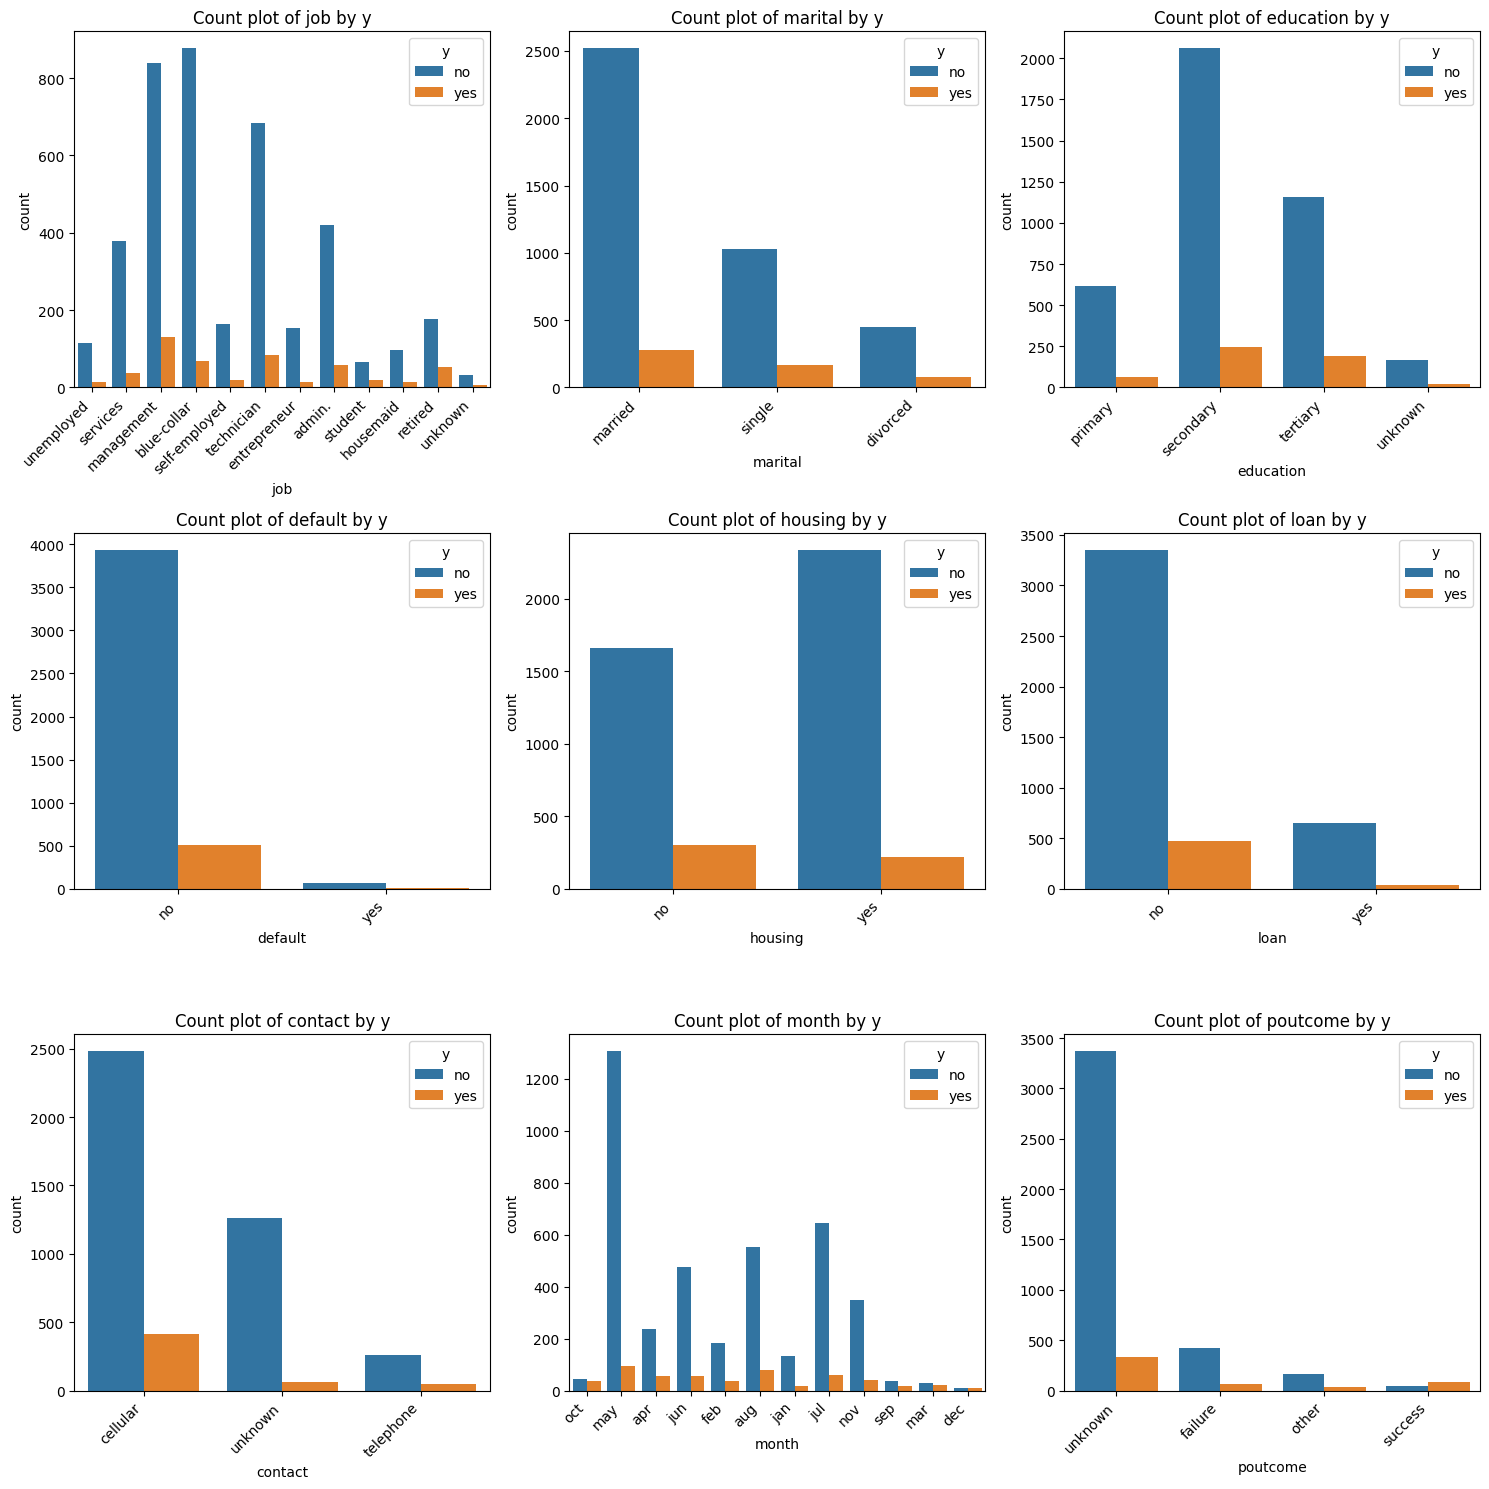

In [ ]:
# Categorical Features Count Plots
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'Count plot of {col} by y')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The count plots show the distribution of categorical features for customers who subscribed ('yes') and those who did not ('no') to a term deposit.

Here are what we observed:

* **Job:** Some job categories, like 'management', 'blue-collar', and 'technician', have a higher number of customers overall. It's interesting to see which job types have a higher proportion of 'yes' subscriptions relative to their total count. 'Retired' and 'student' categories seem to have a relatively higher success rate.
* **Marital:** 'Married' is the most frequent marital status. The proportion of 'yes' subscriptions appears lower among married individuals compared to 'single' or 'divorced'.
* **Education:** 'Secondary' education is the most common. Customers with 'tertiary' education seem to have a slightly higher proportion of 'yes' subscriptions.
* **Default:** The vast majority of customers have no credit default. The number of customers with 'yes' subscriptions is very low among those with a credit default.
* **Housing:** Most customers have housing loans. Customers with no housing loan seem to have a slightly higher proportion of 'yes' subscriptions.
* **Loan:** Most customers do not have personal loans. Similar to housing loans, customers without personal loans have a slightly higher proportion of 'yes' subscriptions.
* **Contact:** 'Cellular' is the most frequent contact type. 'Unknown' contact type has a very low number of 'yes' subscriptions. 'Cellular' and 'telephone' contacts show a higher number of 'yes' subscriptions.
* **Month:** The month of contact seems to influence the subscription rate. Some months, like 'mar', 'sep', 'oct', and 'dec', appear to have a higher proportion of 'yes' subscriptions, possibly due to targeted campaigns or seasonality. 'May' has the highest number of contacts overall, but the proportion of 'yes' is relatively low.
* **Poutcome:** 'Unknown' is the most frequent previous outcome, indicating no previous contact or an unknown outcome. Customers with a 'success' outcome in the previous campaign have a significantly higher likelihood of subscribing again.

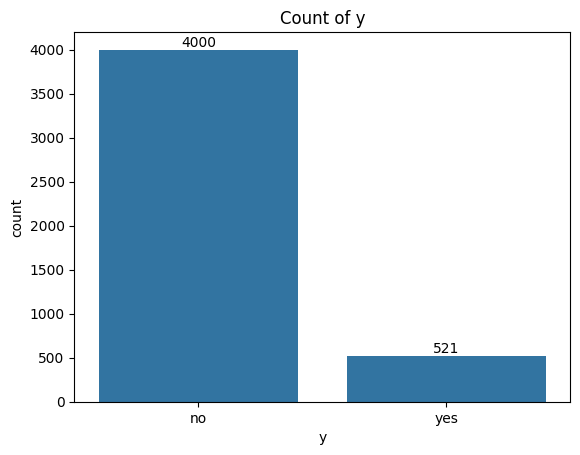

In [ ]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt -> overfitting

The bar chart displays the total count of each category in the target variable 'y', which represents whether a customer subscribed to a term deposit ('yes') or not ('no').

The chart clearly shows that there is a significant imbalance in the dataset. The number of customers who did not subscribe ('no') is much higher than the number of customers who did subscribe ('yes').

This imbalance is important to consider when building a predictive model, as a model trained on such a dataset might be biased towards the majority class ('no') and may not perform well in predicting the minority class ('yes'). While the note in the code mentions that it's okay to try modeling first, it's crucial to be aware of this imbalance and potentially use techniques like oversampling, undersampling, or using evaluation metrics suitable for imbalanced datasets (e.g., precision, recall, F1-score) during model evaluation.

From the visualizations above, we can conclude that to address the imbalance dataset, we need to do oversampling using SMOTENC.

## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,1,0,1787,0,0,0.0,19,10,79,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,5,220,1,339,4,0.0
2,35,4.0,2.0,3,0,1350,1,0,0.0,16,4,185,1,330,1,0.0
3,30,4.0,1.0,3,0,1476,1,1,2.0,3,6,199,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,5,226,1,-1,0,3.0


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


## SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,9.0,1.0,2,0,56,1,1,0.0,29,1,194,1,247,1,0.0
3480,47,7.0,1.0,2,0,440,1,0,2.0,12,6,91,1,-1,0,3.0
2125,52,9.0,1.0,2,0,3554,0,1,0.0,8,7,89,1,-1,0,3.0
3452,31,0.0,1.0,2,0,0,1,0,0.0,29,7,82,5,-1,0,3.0
1667,33,1.0,1.0,2,0,-346,1,1,2.0,23,5,29,3,-1,0,3.0


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,1,0,378,1,0,2.0,16,5,427,3,-1,0,3.0
72,31,4.0,2.0,3,0,6248,1,0,2.0,9,5,154,2,-1,0,3.0
1065,30,10.0,1.0,3,0,0,1,0,0.0,18,11,756,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,11,193,3,-1,0,3.0
130,41,1.0,1.0,1,0,168,1,0,0.0,18,11,187,3,-1,0,3.0


In [ ]:
from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
]

# Pisah x dan y dulu baru dilakukan oversampling / undersampling
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

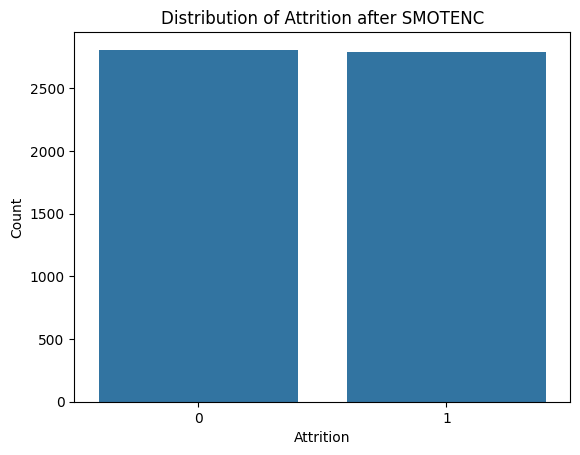

In [ ]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1192
           1       0.86      0.89      0.88      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



##Feature Importance

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[4.88704881e-02 3.32079002e-02 1.19353532e-02 2.43582608e-02
 2.19154880e-04 8.29101570e-02 2.49546108e-02 3.87388236e-02
 6.84475059e-02 6.33682677e-02 6.84103889e-02 3.72162372e-01
 2.04047366e-02 6.63467501e-02 5.87347153e-03 6.97917592e-02]


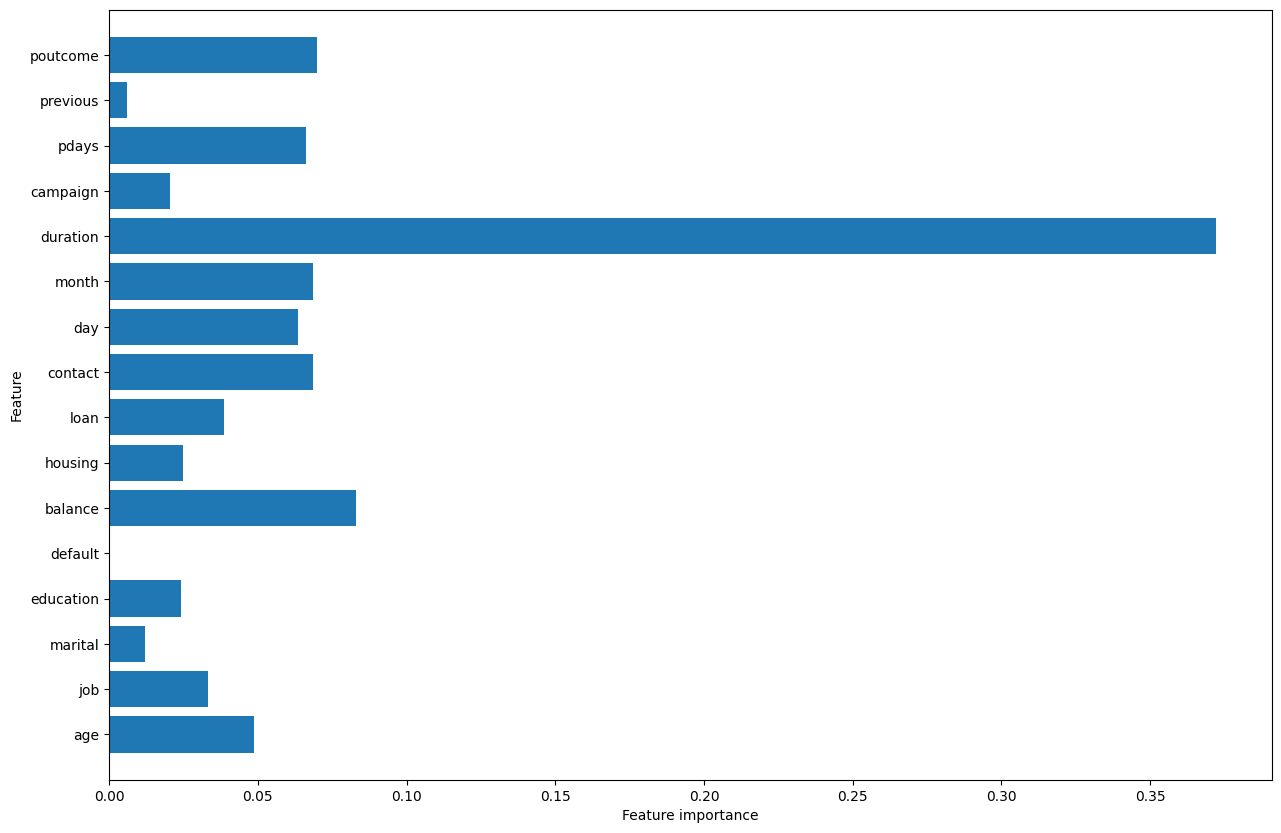

In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.372162
balance,0.082910
poutcome,0.069792
contact,0.068448
month,0.068410
pdays,0.066347
day,0.063368


In [ ]:
# using only important features for the prediction
important_features = ["duration", "balance", "poutcome",
    "contact", "month", "pdays", "day"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [ ]:
display(X_importance)
display(y_importance)

,duration,balance,poutcome,contact,month,pdays,day
0,79,1787,3.0,0.0,10,-1,19
1,220,4789,0.0,0.0,5,339,11
2,185,1350,0.0,0.0,4,330,16
3,199,1476,3.0,2.0,6,-1,3
4,226,0,3.0,2.0,5,-1,5
...,...,...,...,...,...,...,...
4516,329,-333,3.0,0.0,7,-1,30
4517,153,-3313,3.0,2.0,5,-1,9
4518,151,295,3.0,0.0,8,-1,19
4519,129,1137,1.0,0.0,2,211,6


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [ ]:
# oversampling againnn
categorical_features = [ "poutcome","contact", "month"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 7), (2400, 7))

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1206
           1       0.88      0.89      0.89      1194

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



### Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 41}
Best cross-validation f1 score: 0.866


### KFold Cross Validation

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8797546  0.88943792 0.88532676 0.87765293 0.88357843]
Average score: 0.88


The initial test set score might have been slightly inflated due to a lucky data split. KFold and Grid Search use cross-validation, which averages performance across multiple splits. This provides a more realistic and reliable estimate of how well the model will generalize to new data, which is what hyperparameter tuning aims to optimize.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_importance, y_train_importance)

# Make predictions on the training and test sets
y_pred_train_rf = rf_clf.predict(X_train_importance)
y_pred_test_rf = rf_clf.predict(X_test_importance)

# Print classification reports
print("=== Classification Report (Random Forest - Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_rf))

print("\n=== Classification Report (Random Forest - Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_rf))

=== Classification Report (Random Forest - Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Random Forest - Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1206
           1       0.89      0.95      0.92      1194

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



### Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

rf_clf = RandomForestClassifier(random_state=42) # Initialize a Random Forest classifier
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_ # Get the best estimator from the grid search
y_pred_test_rf_tuned = best_rf_clf.predict(X_test)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation f1 score for Random Forest: {:.3f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Best cross-validation f1 score for Random Forest: 0.907


### KFold Cross Validation

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
from sklearn.ensemble import RandomForestClassifier

score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92716049 0.93349754 0.93267449 0.91293532 0.93374233]
Average score: 0.93


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_gb = gb_clf.predict(X_train)
y_pred_test_gb = gb_clf.predict(X_test)

# Print classification reports
print("=== Classification Report (Gradient Boosting - Training Set) ===")
print(classification_report(y_train, y_pred_train_gb))

print("\n=== Classification Report (Gradient Boosting - Test Set) ===")
print(classification_report(y_test, y_pred_test_gb))

=== Classification Report (Gradient Boosting - Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2808
           1       0.87      0.91      0.89      2792

    accuracy                           0.88      5600
   macro avg       0.88      0.88      0.88      5600
weighted avg       0.88      0.88      0.88      5600


=== Classification Report (Gradient Boosting - Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1192
           1       0.86      0.88      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



### Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

gb_clf = GradientBoostingClassifier(random_state=42) # Initialize a Gradient Boosting classifier
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_gb.fit(X_train, y_train)

best_gb_clf = grid_search_gb.best_estimator_ # Get the best estimator from the grid search
y_pred_test_gb_tuned = best_gb_clf.predict(X_test)

print("Best parameters for Gradient Boosting: ", grid_search_gb.best_params_)
print("Best cross-validation f1 score for Gradient Boosting: {:.3f}".format(grid_search_gb.best_score_))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'random_state': 42}
Best cross-validation f1 score for Gradient Boosting: 0.906


### KFold Cross Validation

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

score = cross_val_score(GradientBoostingClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.90220049 0.9004914  0.8952497  0.8809816  0.8997555 ]
Average score: 0.90


## Model Evaluation

In [ ]:
# Decision Tree

best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report Decision Tree (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Decision Tree (Test Set) ===")
print(classification_report(y_test, y_pred_test))

# Random Forest

best_params = grid_search_rf.best_params_

final_rf = RandomForestClassifier(**best_params)
final_rf.fit(X_train, y_train)

y_pred_train = final_rf.predict(X_train)
y_pred_test  = final_rf.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report Decision Tree (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Decision Tree (Test Set) ===")
print(classification_report(y_test, y_pred_test))

# Gradient Boosting

best_params = grid_search_gb.best_params_

final_gb = GradientBoostingClassifier(**best_params)
final_gb.fit(X_train, y_train)

y_pred_train = final_gb.predict(X_train)
y_pred_test  = final_gb.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report Decision Tree (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Decision Tree (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Decision Tree (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2808
           1       0.90      0.96      0.93      2792

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600


=== Classification Report Decision Tree (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1192
           1       0.87      0.91      0.89      1208

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400


=== Classification Report Decision Tree (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2808
           1       0.98      1.00      0.99      2792

    ac

In [ ]:
# Create a comparison table from your results
data = {
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "Train Accuracy": [0.93, 0.99, 1.00],
    "Test Accuracy": [0.89, 0.92, 0.92],
    "Train F1-Score": [0.93, 0.99, 1.00],
    "Test F1-Score": [0.89, 0.92, 0.92],
    "Overfitting Indicator": ["Moderate", "Slight", "High (perfect train)"]
}

# Convert to DataFrame
df_results = pd.DataFrame(data)

# Display neatly
df_results.style.set_caption("Comparison of Classification Models").background_gradient(cmap="Blues", subset=["Test Accuracy", "Test F1-Score"])


,Model,Train Accuracy,Test Accuracy,Train F1-Score,Test F1-Score,Overfitting Indicator
0,Decision Tree,0.930000,0.890000,0.930000,0.890000,Moderate
1,Random Forest,0.990000,0.920000,0.990000,0.920000,Slight
2,Gradient Boosting,1.000000,0.920000,1.000000,0.920000,High (perfect train)


* **Decision Tree:**
    * Shows good performance on the training set (0.93 accuracy and F1-score).
    * The performance drops slightly on the test set (0.89 accuracy and F1-score), indicating moderate overfitting.

* **Random Forest:**
    * Achieves very high performance on the training set (0.99 accuracy and F1-score).
    * The performance on the test set is also high (0.92 accuracy and F1-score), but there is a slight drop from the training set, suggesting slight overfitting.

* **Gradient Boosting:**
    * Shows perfect performance on the training set (1.00 accuracy and F1-score), which is a strong indicator of high overfitting.
    * The performance on the test set is good (0.92 accuracy and F1-score), similar to the Random Forest, but the significant difference between training and test scores highlights the overfitting issue.

**Conclusion:**

Based on the test set performance and the overfitting indicator, the **Random Forest** model appears to be the best choice among the three. It achieves a good balance between performance and generalization to unseen data, showing only slight overfitting compared to the high overfitting observed in the Gradient Boosting model. While the Decision Tree shows less overfitting, its overall performance is lower than the Random Forest.